In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
df = pd.read_csv('Students_Grading_Dataset.csv')
df

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


In [5]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [6]:
df.dtypes

Student_ID                     object
First_Name                     object
Last_Name                      object
Email                          object
Gender                         object
Age                             int64
Department                     object
Attendance (%)                float64
Midterm_Score                 float64
Final_Score                   float64
Assignments_Avg               float64
Quizzes_Avg                   float64
Participation_Score           float64
Projects_Score                float64
Total_Score                   float64
Grade                          object
Study_Hours_per_Week          float64
Extracurricular_Activities     object
Internet_Access_at_Home        object
Parent_Education_Level         object
Family_Income_Level            object
Stress_Level (1-10)             int64
Sleep_Hours_per_Night         float64
dtype: object

In [7]:
df['Gender'] = df['Gender'].astype('category')
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].astype('category')
df['Internet_Access_at_Home'] = df['Internet_Access_at_Home'].astype('category')

In [8]:
a = df['Gender'].value_counts()
b = df['Extracurricular_Activities'].value_counts()
c = df['Internet_Access_at_Home'].value_counts()
a, b, c

(Gender
 Male      2551
 Female    2449
 Name: count, dtype: int64,
 Extracurricular_Activities
 No     3493
 Yes    1507
 Name: count, dtype: int64,
 Internet_Access_at_Home
 Yes    4485
 No      515
 Name: count, dtype: int64)

In [9]:
df.isna().any()

Student_ID                    False
First_Name                    False
Last_Name                     False
Email                         False
Gender                        False
Age                           False
Department                    False
Attendance (%)                 True
Midterm_Score                 False
Final_Score                   False
Assignments_Avg                True
Quizzes_Avg                   False
Participation_Score           False
Projects_Score                False
Total_Score                   False
Grade                         False
Study_Hours_per_Week          False
Extracurricular_Activities    False
Internet_Access_at_Home       False
Parent_Education_Level         True
Family_Income_Level           False
Stress_Level (1-10)           False
Sleep_Hours_per_Night         False
dtype: bool

In [10]:
m1 = df['Attendance (%)'].isnull().sum()
m2 = df['Assignments_Avg'].isnull().sum()
m3 = df['Parent_Education_Level'].isnull().sum()
m1, m2, m3

(np.int64(516), np.int64(517), np.int64(1794))

In [11]:
attendance_mean = df['Attendance (%)'].mean()
df['Attendance (%)'].fillna(attendance_mean)
attendance_mean

np.float64(75.431409455843)

In [12]:
df['Parent_Education_Level'].fillna("Неизвестно", inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_17832\851354028.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parent_Education_Level'].fillna("Неизвестно", inplace=True)


## Проверка на нормальность


In [13]:
shapiro_age = stats.shapiro(df['Age'].dropna())
print(f"Age: Stat={shapiro_age.statistic:.3f}, p-value={shapiro_age.pvalue}")

shapiro_attendance = stats.shapiro(df['Attendance (%)'].dropna())
print(f"Attendance (%): Stat={shapiro_attendance.statistic:.3f}, p-value={shapiro_attendance.pvalue}")

shapiro_midterm = stats.shapiro(df['Midterm_Score'].dropna())
print(f"Midterm_Score: Stat={shapiro_midterm.statistic:.3f}, p-value={shapiro_midterm.pvalue}")

shapiro_final = stats.shapiro(df['Final_Score'].dropna())
print(f"Final_Score: Stat={shapiro_final.statistic:.3f}, p-value={shapiro_final.pvalue}")

shapiro_assignments = stats.shapiro(df['Assignments_Avg'].dropna())
print(f"Assignments_Avg: Stat={shapiro_assignments.statistic:.3f}, p-value={shapiro_assignments.pvalue}")

shapiro_quizzes = stats.shapiro(df['Quizzes_Avg'].dropna())
print(f"Quizzes_Avg: Stat={shapiro_quizzes.statistic:.3f}, p-value={shapiro_quizzes.pvalue}")

shapiro_participation = stats.shapiro(df['Participation_Score'].dropna())
print(f"Participation_Score: Stat={shapiro_participation.statistic:.3f}, p-value={shapiro_participation.pvalue}")

shapiro_projects = stats.shapiro(df['Projects_Score'].dropna())
print(f"Projects_Score: Stat={shapiro_projects.statistic:.3f}, p-value={shapiro_projects.pvalue}")

shapiro_total = stats.shapiro(df['Total_Score'].dropna())
print(f"Total_Score: Stat={shapiro_total.statistic:.3f}, p-value={shapiro_total.pvalue}")

shapiro_study_hours = stats.shapiro(df['Study_Hours_per_Week'].dropna())
print(f"Study_Hours_per_Week: Stat={shapiro_study_hours.statistic:.3f}, p-value={shapiro_study_hours.pvalue}")

shapiro_stress = stats.shapiro(df['Stress_Level (1-10)'].dropna())
print(f"Stress_Level (1-10): Stat={shapiro_stress.statistic:.3f}, p-value={shapiro_stress.pvalue}")

shapiro_sleep = stats.shapiro(df['Sleep_Hours_per_Night'].dropna())
print(f"Sleep_Hours_per_Night: Stat={shapiro_sleep.statistic:.3f}, p-value={shapiro_sleep.pvalue}")

Age: Stat=0.919, p-value=1.0810411565966776e-45
Attendance (%): Stat=0.957, p-value=2.3062300096989003e-34
Midterm_Score: Stat=0.957, p-value=4.373612435881249e-36
Final_Score: Stat=0.955, p-value=1.1134199976607749e-36
Assignments_Avg: Stat=0.955, p-value=3.933640349445673e-35
Quizzes_Avg: Stat=0.954, p-value=6.01116115651483e-37
Participation_Score: Stat=0.954, p-value=3.867382334119578e-37
Projects_Score: Stat=0.954, p-value=5.9046312688244314e-37
Total_Score: Stat=0.956, p-value=1.7372450365530298e-36
Study_Hours_per_Week: Stat=0.953, p-value=1.653130838462009e-37
Stress_Level (1-10): Stat=0.936, p-value=5.040892622375149e-42
Sleep_Hours_per_Night: Stat=0.954, p-value=3.985747548353274e-37


АБСОЛЮТНО ВСЕ ДАННЫЕ ИМЕЮТ НЕНОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

## Визуализации

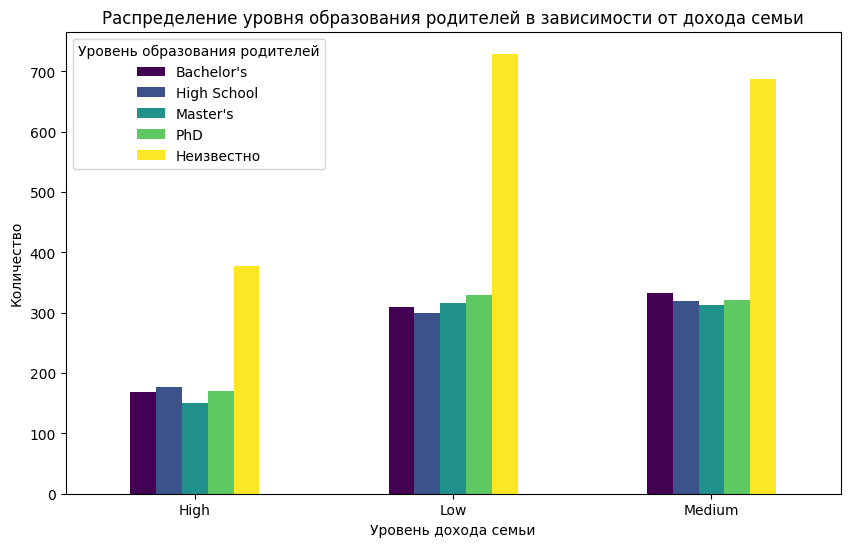

In [14]:
education_income_counts = df.groupby("Family_Income_Level")["Parent_Education_Level"].value_counts().unstack()
education_income_counts.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Распределение уровня образования родителей в зависимости от дохода семьи")
plt.xlabel("Уровень дохода семьи")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.legend(title="Уровень образования родителей")
plt.show()

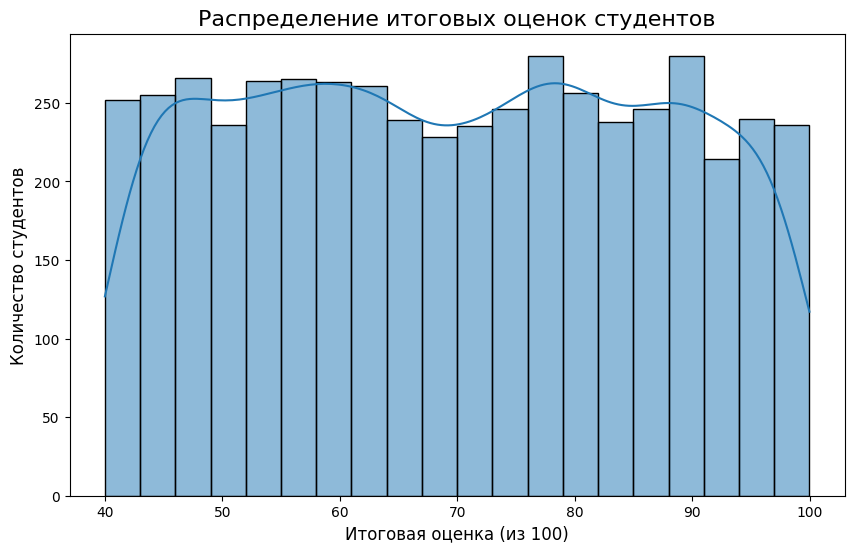

In [15]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Final_Score', bins=20, kde=True)

plt.title('Распределение итоговых оценок студентов', fontsize=16)
plt.xlabel('Итоговая оценка (из 100)', fontsize=12)
plt.ylabel('Количество студентов', fontsize=12)

plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_17832\801237595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


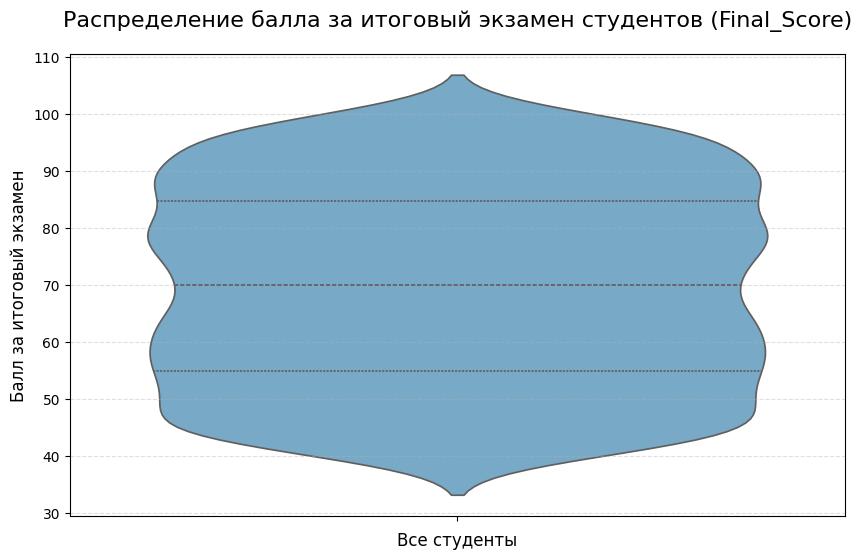

In [46]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    data=df, 
    y='Final_Score',
    inner='quartile', 
    palette='Blues',   
    bw_method=0.2     
)


plt.title('Распределение балла за итоговый экзамен студентов (Final_Score)', fontsize=16, pad=20)
plt.ylabel('Балл за итоговый экзамен', fontsize=12)
plt.xlabel('Все студенты', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

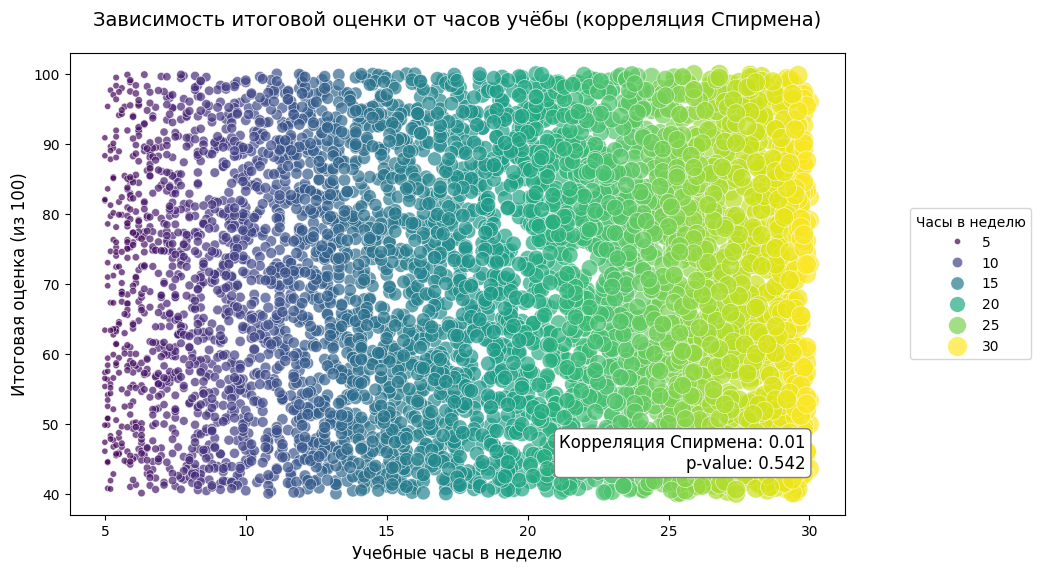

In [17]:
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    data=df,
    x='Study_Hours_per_Week',
    y='Final_Score',
    hue='Study_Hours_per_Week',  
    palette='viridis',
    size='Study_Hours_per_Week', 
    sizes=(20, 200),
    alpha=0.7
)

corr, p_value = stats.spearmanr(df['Study_Hours_per_Week'], df['Final_Score'])

plt.text(
    x=0.95, y=0.1,
    s=f'Корреляция Спирмена: {corr:.2f}\np-value: {p_value:.3f}',
    ha='right',
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round')
)

plt.title('Зависимость итоговой оценки от часов учёбы (корреляция Спирмена)', fontsize=14, pad=20)
plt.xlabel('Учебные часы в неделю', fontsize=12)
plt.ylabel('Итоговая оценка (из 100)', fontsize=12)

scatter.legend(
    title='Часы в неделю',
    bbox_to_anchor=(1.25, 0.5),
    loc='center right'
)

plt.show()

Между часами в неделю и итоговой оценкой нет значимой связи

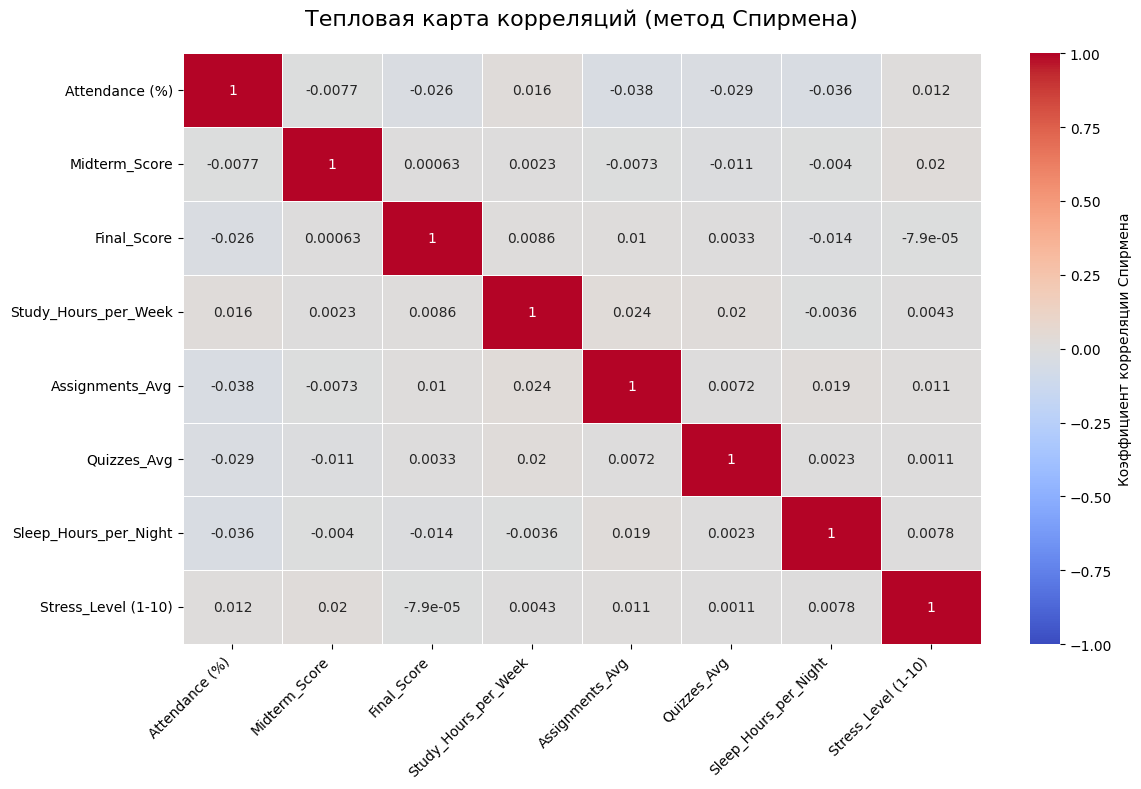

In [18]:
numeric_cols = [
    'Attendance (%)', 
    'Midterm_Score', 
    'Final_Score', 
    'Study_Hours_per_Week',
    'Assignments_Avg',
    'Quizzes_Avg',
    'Sleep_Hours_per_Night',
    'Stress_Level (1-10)'
]

corr_matrix = df[numeric_cols].corr(method='spearman')

plt.figure(figsize=(12, 8))


sns.heatmap(
    corr_matrix, 
    annot=True,  
    cmap='coolwarm', 
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Коэффициент корреляции Спирмена'}
)

plt.title('Тепловая карта корреляций (метод Спирмена)', pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Никакие переменные не показывают сильной корреляции с оценками или друг с другом.

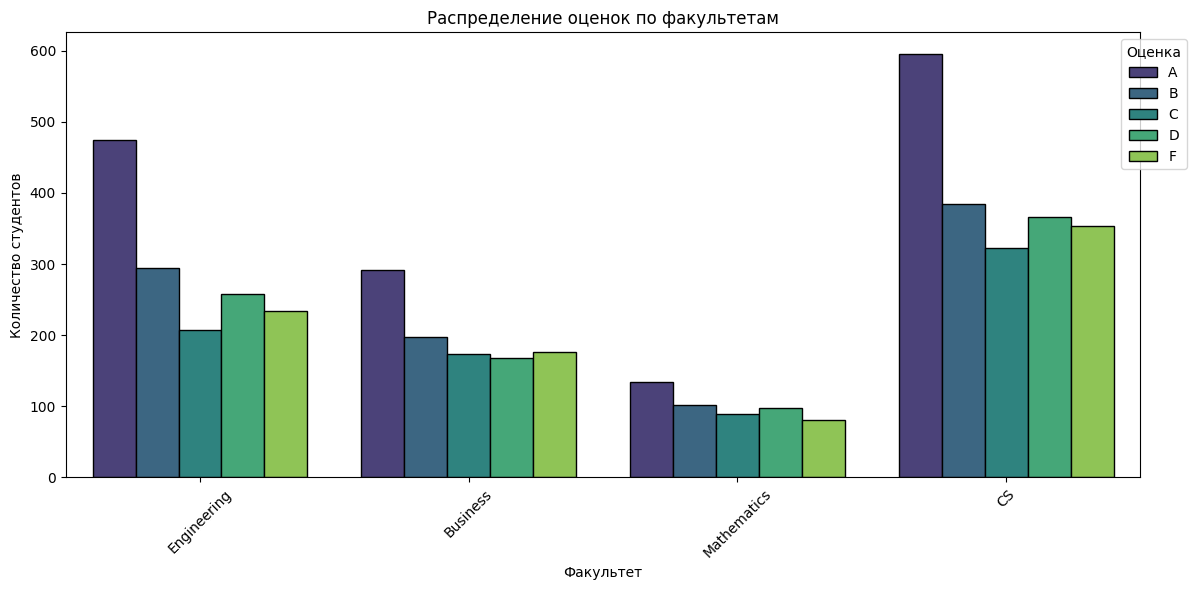

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Department', hue='Grade', 
             hue_order=['A','B','C','D','F'],
             palette='viridis', edgecolor='black')
plt.title('Распределение оценок по факультетам')
plt.xlabel('Факультет')
plt.ylabel('Количество студентов')
plt.legend(title='Оценка', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

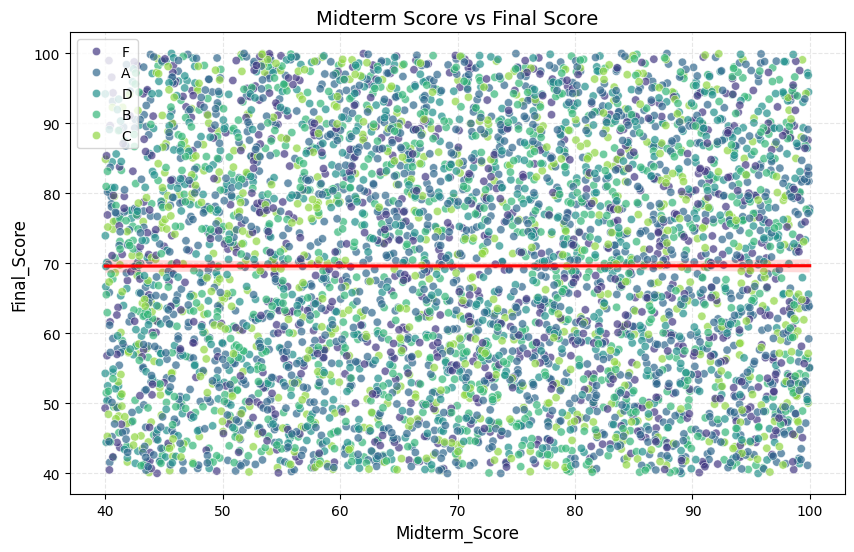

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Midterm_Score',
    y='Final_Score',
    hue='Grade',
    palette='viridis',
    alpha=0.7
)
plt.title('Midterm Score vs Final Score', fontsize=14)
plt.xlabel('Midterm Score', fontsize=12)
plt.ylabel('Final Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

sns.regplot(
    data=df,
    x='Midterm_Score',
    y='Final_Score',
    scatter=False,
    color='red',
    line_kws={'label': 'Trendline'}
)
plt.legend()
plt.show()

## Статистические тесты

In [21]:
#H0: Нет зависимости между доходом семьи и выбранным факультетом
#HA: Зависимость существует

contingency_table = pd.crosstab(
    df['Family_Income_Level'], 
    df['Department']
)
print("Таблица сопряженности:")
print(contingency_table)

Таблица сопряженности:
Department           Business   CS  Engineering  Mathematics
Family_Income_Level                                         
High                      180  420          335          109
Low                       408  826          558          191
Medium                    418  776          576          203


In [22]:
alpha = 0.05
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nРезультаты теста:")
print(f"χ² = {chi2:.2f}, p-value = {p_value:.4f}")
if p_value < alpha:
    print("Отклонить нулевую гипотезу")
else:
    print("Нельзя отклонить нулевую гипотезу")


Результаты теста:
χ² = 11.24, p-value = 0.0814
Нельзя отклонить нулевую гипотезу


In [23]:
#H0: Нет зависимости между факультетом и участием студента во внеклассных мероприятиях
#HA: Зависимость существует

contingency_table1 = pd.crosstab(
    df['Extracurricular_Activities'], 
    df['Department']
)
print("Таблица сопряженности:")
print(contingency_table1)

Таблица сопряженности:
Department                  Business    CS  Engineering  Mathematics
Extracurricular_Activities                                          
No                               706  1411         1032          344
Yes                              300   611          437          159


In [24]:
alpha = 0.05
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table1)
print(f"\nРезультаты теста:")
print(f"χ² = {chi2:.2f}, p-value = {p_value:.4f}")
if p_value < alpha:
    print("Отклонить нулевую гипотезу")
else:
    print("Нельзя отклонить нулевую гипотезу")


Результаты теста:
χ² = 0.68, p-value = 0.8784
Нельзя отклонить нулевую гипотезу


## ANOVA

In [36]:
departments = df['Department'].unique()
print(f"\nТест Левена: p-value = {levene_p:.4f}",
      "(дисперсии однородны)" if levene_p > 0.05 else "(дисперсии различаются)")
if levene_p > 0.05:
    f_stat, p_value = stats.f_oneway(*samples)
    print(f"\nРезультаты ANOVA: F = {f_stat:.2f}, p-value = {p_value:.5f}")
    
    if p_value < 0.05:
        print("Есть статистически значимые различия между факультетами")
    else:
        print("Нет значимых различий между факультетами")
else:
    print("\nПредположения ANOVA нарушены")
print("\nтест Тьюки:")
tukey = pairwise_tukeyhsd(
    endog=df['Final_Score'],
    groups=df['Department'],
    alpha=0.05
)
print(tukey.summary())


Тест Левена: p-value = 0.1341 (дисперсии однородны)

Результаты ANOVA: F = 1.98, p-value = 0.11480
Нет значимых различий между факультетами

тест Тьюки:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
   Business          CS  -0.9211 0.5086 -2.6299 0.7876  False
   Business Engineering   0.3736 0.9519 -1.4389 2.1861  False
   Business Mathematics  -1.0001 0.7123 -3.4187 1.4184  False
         CS Engineering   1.2947 0.1257 -0.2236 2.8131  False
         CS Mathematics   -0.079 0.9997 -2.2857 2.1278  False
Engineering Mathematics  -1.3737 0.4118 -3.6617 0.9143  False
-------------------------------------------------------------


## Модели 

In [ ]:
data = df[['Attendance (%)', 'Midterm_Score', 'Study_Hours_per_Week', 'Final_Score']].dropna()

X = data[['Attendance (%)', 'Midterm_Score', 'Study_Hours_per_Week']] 
y = data['Final_Score'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Коэффициенты модели: {model.coef_}")
print(f"Перехват (intercept): {model.intercept_:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

Коэффициенты модели: [-0.0270858   0.01560656  0.01419136]
Перехват (intercept): 70.36
Среднеквадратичная ошибка (MSE): 292.82
Коэффициент детерминации (R²): -0.00


In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=5,       
    random_state=42    
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

Среднеквадратичная ошибка (MSE): 293.79
Коэффициент детерминации (R²): -0.00


## Линейная регрессия (StatsModels)

In [42]:
df = df[['Final_Score', 'Attendance (%)', 'Midterm_Score', 'Study_Hours_per_Week']].dropna()
X = df[['Attendance (%)', 'Midterm_Score', 'Study_Hours_per_Week']]
y = df['Final_Score']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Final_Score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.039
Date:                Fri, 11 Apr 2025   Prob (F-statistic):              0.374
Time:                        21:25:08   Log-Likelihood:                -19115.
No. Observations:                4484   AIC:                         3.824e+04
Df Residuals:                    4480   BIC:                         3.826e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   71.5119 